<a href="https://colab.research.google.com/github/nishshanka20/ML_DL_test_projects/blob/cifar-10-dataset-CNN/cifar_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [39]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

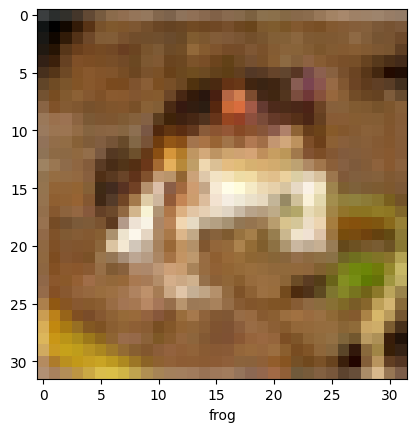

In [37]:
plot_sample(X_train,y_train,0)

In [12]:
X_train=X_train/255
X_test=X_test/255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
nn=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

nn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

nn.fit(X_train,y_train,epochs=3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.3008 - loss: 1.9406
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 95ms/step - accuracy: 0.4195 - loss: 1.6421
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.4570 - loss: 1.5484


In [23]:
nn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4450 - loss: 1.5555


[1.5606253147125244, 0.43950000405311584]

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=nn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.44      0.52      1000
           1       0.64      0.47      0.54      1000
           2       0.46      0.08      0.14      1000
           3       0.24      0.61      0.35      1000
           4       0.40      0.42      0.41      1000
           5       0.40      0.28      0.33      1000
           6       0.48      0.48      0.48      1000
           7       0.75      0.29      0.42      1000
           8       0.53      0.69      0.60      1000
           9       0.44      0.64      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.43     10000
weighted avg       0.50      0.44      0.43     10000



In [27]:
CNN=models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [31]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.3753 - loss: 1.7048
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6016 - loss: 1.1341
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6586 - loss: 0.9799
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6872 - loss: 0.8929
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7154 - loss: 0.8237
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7357 - loss: 0.7596
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7511 - loss: 0.7174
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7691 - loss: 0.6608
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7785 - loss: 0.6349
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7971 - loss: 0.5849


In [33]:
CNN.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6940 - loss: 0.9395


[0.9541391730308533, 0.6901000142097473]

In [34]:
y_pred=CNN.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))
#

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74      1000
           1       0.90      0.67      0.76      1000
           2       0.65      0.53      0.58      1000
           3       0.50      0.51      0.51      1000
           4       0.63      0.70      0.66      1000
           5       0.66      0.55      0.60      1000
           6       0.82      0.70      0.75      1000
           7       0.75      0.75      0.75      1000
           8       0.76      0.83      0.79      1000
           9       0.64      0.86      0.73      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [41]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

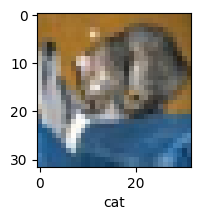

In [42]:
plot_sample(X_test,y_test,0)

In [43]:
y_pred[:5]

array([[1.4540069e-04, 5.4929042e-06, 1.1765417e-03, 9.1335368e-01,
        6.6086045e-06, 6.1557017e-02, 8.9210048e-03, 1.2000661e-05,
        1.3891603e-02, 9.3069440e-04],
       [3.8521292e-04, 1.7146089e-03, 1.4572616e-06, 6.2004358e-07,
        1.1603436e-07, 3.1896261e-09, 1.8896150e-12, 1.6037897e-09,
        9.9788886e-01, 9.1377879e-06],
       [4.7894102e-01, 1.1588204e-01, 1.3138410e-03, 1.3731799e-02,
        2.2347975e-03, 5.8164948e-04, 5.4801305e-05, 2.1988414e-03,
        3.5397345e-01, 3.1087639e-02],
       [9.2796427e-01, 1.9977528e-03, 1.8535312e-02, 1.6557886e-03,
        3.6682622e-04, 1.1133313e-05, 1.0777701e-04, 7.6512670e-06,
        4.7360208e-02, 1.9931600e-03],
       [6.1400106e-06, 1.3422524e-06, 1.4965651e-02, 2.6913431e-02,
        7.6374006e-01, 2.7001612e-03, 1.9164848e-01, 1.9769868e-05,
        3.2803327e-06, 1.6979851e-06]], dtype=float32)

In [50]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [51]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

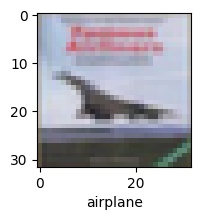

In [52]:
plot_sample(X_test,y_test,3)

In [53]:
classes[y_classes[3]]

'airplane'

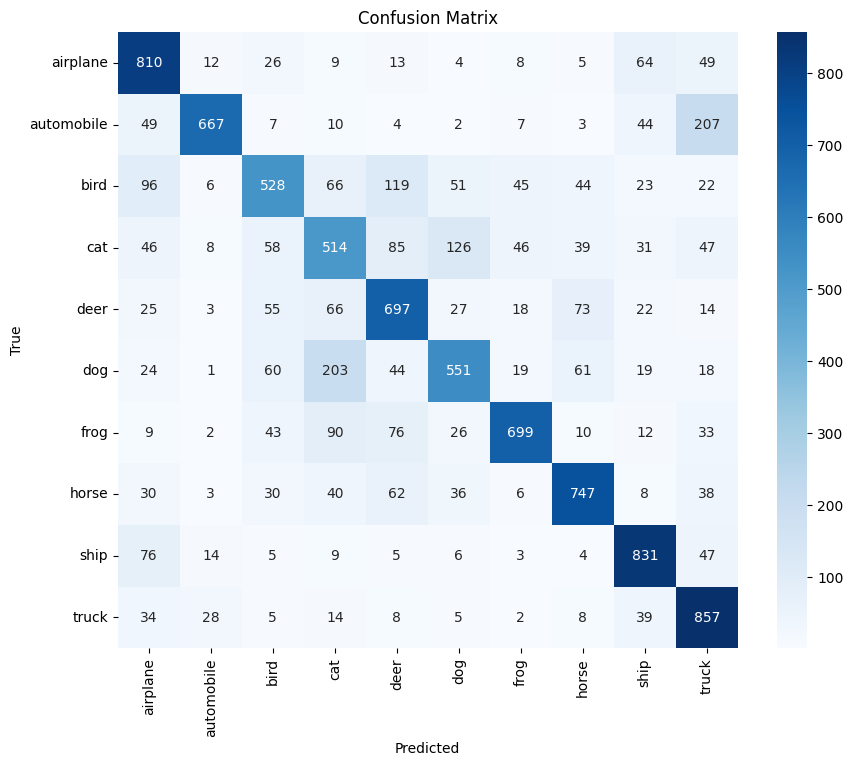

In [54]:
# prompt: make confusion matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_classes are defined from previous code
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()